# TEAM - THE BUG BUSTERS
##### BY NAJEEB SAIYED
##### BY VABHAV KAPIL
najeeb.saiyed.btech2021@sitpune.edu.in

---
Problem Statement:

Automated Medical Forms Extraction for Efficient Healthcare Data Management


---
# Using Pytesseract and Regular Expression

### Importing necessary libraries

In [10]:
# Importing packages to for pdf To image
import os
import sys
from pdf2image import convert_from_path # Convert it by allocating file name 
import cv2
from PIL import Image
import numpy as np
# Import Pytesseract For Text To Image Conversion
import pytesseract
import re
import json
import pytesseract
from PIL import Image

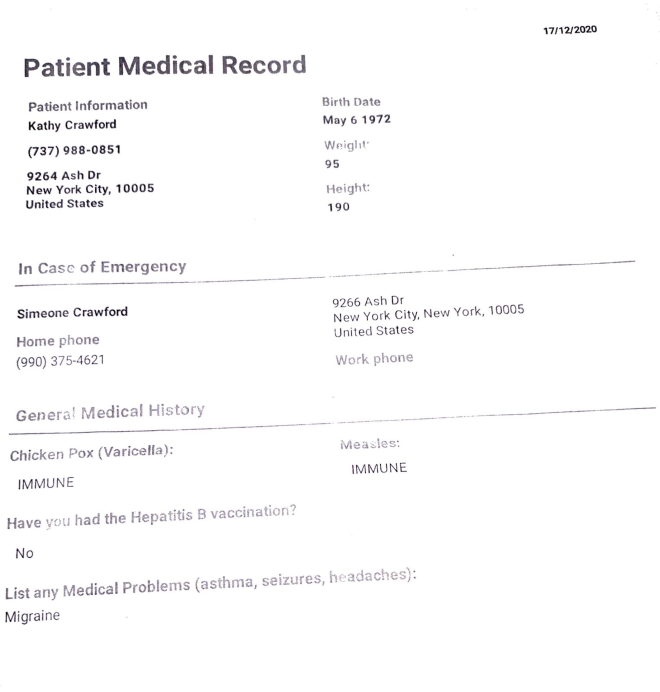

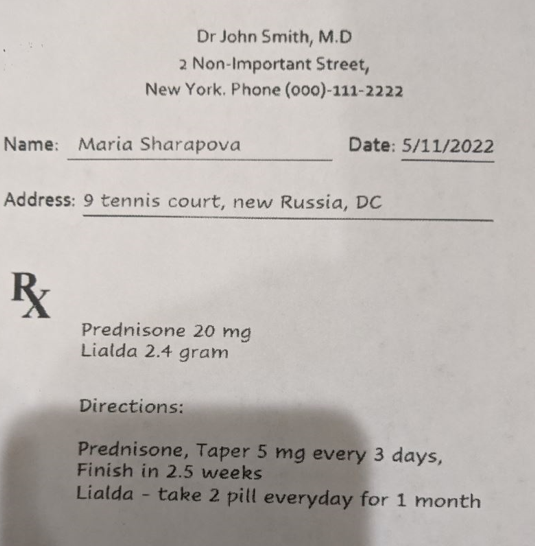

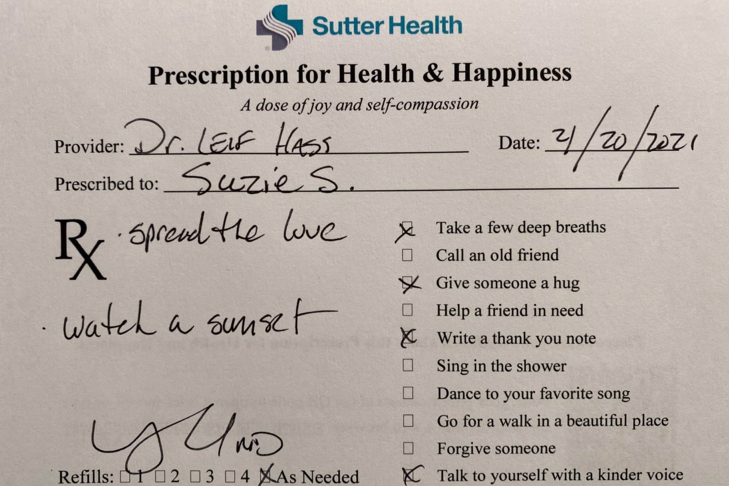

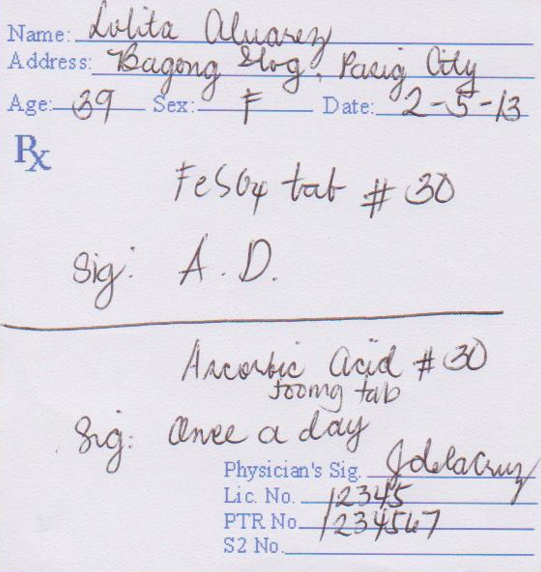

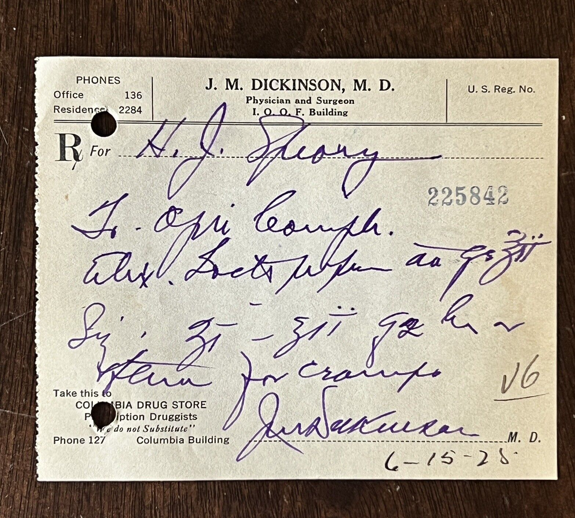

---
## Image 1

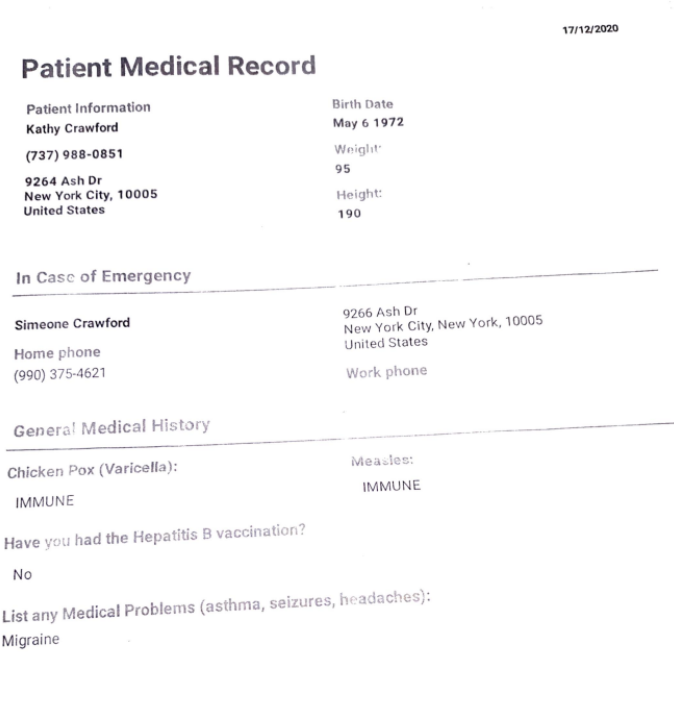

In [36]:
pages = convert_from_path(r"C:\Users\Najeeb\Desktop\SIT Semesters\Sem 6\Innerve 8 - automating data extraction for health records\pd_1.pdf",poppler_path=r'C:\Users\Najeeb\Desktop\SIT Semesters\Sem 6\Innerve 8 - automating data extraction for health records\poppler-0.68.0_x86\poppler-0.68.0\bin')
pages[0].show()

In [37]:
pytesseract.pytesseract.tesseract_cmd=r"C:\Program Files\Tesseract-OCR\tesseract.exe" # Mentioning Tesseract Directory To Utilize OCR Engine
text = pytesseract.image_to_string(pages[0],lang='eng') # Conversion Step 
print(text)

47/12/2020

Patient Medical Record

Patient Information Birth Date
Kathy Crawford May 6 1972
(737) 988-0851 Weight
9264 Ash Dr 95
New York City, 10005 .
United States Height:
190
In Case of Emergency
m _ a _
Simeone Crawford 9266 Ash Dr
New York City, New York, 10005
Home phone United States
(990) 375-4621
Work phone
Genera! Medical History
. : a ee

Chicken Pox (Varicella):

IMMUNE

Have you had the Hepatitis B vaccination?

No

List any Medical Problems (asthma, seizures, headaches):

Migraine



#### Cleaning text

In [38]:
def clean_text(text):
    # Remove newline characters
    text = re.sub(r'\n', ' ', text)
    
    # Remove special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

clean_text(text)

'47122020 Patient Medical Record Patient Information Birth Date Kathy Crawford May 6 1972 737 9880851 Weight 9264 Ash Dr 95 New York City 10005 United States Height 190 In Case of Emergency m a Simeone Crawford 9266 Ash Dr New York City New York 10005 Home phone United States 990 3754621 Work phone Genera Medical History a ee Chicken Pox Varicella IMMUNE Have you had the Hepatitis B vaccination No List any Medical Problems asthma seizures headaches Migraine'

In [39]:

# Define regular expressions for extracting data
patient_info_regex = r"Patient Information Birth Date\s+([\w\s]+?)\s+\w+\s+\d+\s+\d+"
phone_regex = r"\((\d{3})\) (\d{3}-\d{4})"
address_regex = r"(\d+\s[\w\s]+),\s([\w\s]+),\s(\d{5})\s"
height_regex = r"Height:\s+(\d+)\s"
medical_history_regex = r"Medical History\s+[\.:a\s]+([\w\s]+)"

# Extract data using regular expressions
patient_info_match = re.search(patient_info_regex, text)
phone_matches = re.findall(phone_regex, text)
address_match = re.search(address_regex, text)
height_match = re.search(height_regex, text)
medical_history_match = re.search(medical_history_regex, text)

# Prepare data as dictionary
data = {
    "Patient Name": patient_info_match.group(1).strip() if patient_info_match else None,
    "Birth Date": patient_info_match.group(0).split()[-3] + " " + patient_info_match.group(0).split()[-2] if patient_info_match else None,
    "Phone Numbers": [{"Type": "Home", "Number": match} for match in phone_matches],
    "Address": {
        "Street": address_match.group(1).strip() if address_match else None,
        "City": address_match.group(2).strip() if address_match else None,
        "Zip Code": address_match.group(3) if address_match else None,
    },
    "Height": height_match.group(1) if height_match else None,
    "Medical History": medical_history_match.group(1) if medical_history_match else None,
}

# Convert dictionary to JSON
json_data = json.dumps(data, indent=4)
print(json_data)

{
    "Patient Name": "Kathy Crawford",
    "Birth Date": "May 6",
    "Phone Numbers": [
        {
            "Type": "Home",
            "Number": [
                "737",
                "988-0851"
            ]
        },
        {
            "Type": "Home",
            "Number": [
                "990",
                "375-4621"
            ]
        }
    ],
    "Address": {
        "Street": "190\nIn Case of Emergency\nm _ a _\nSimeone Crawford 9266 Ash Dr\nNew York City",
        "City": "New York",
        "Zip Code": "10005"
    },
    "Height": "190",
    "Medical History": "ee\n\nChicken Pox "
}


---
### Image 2

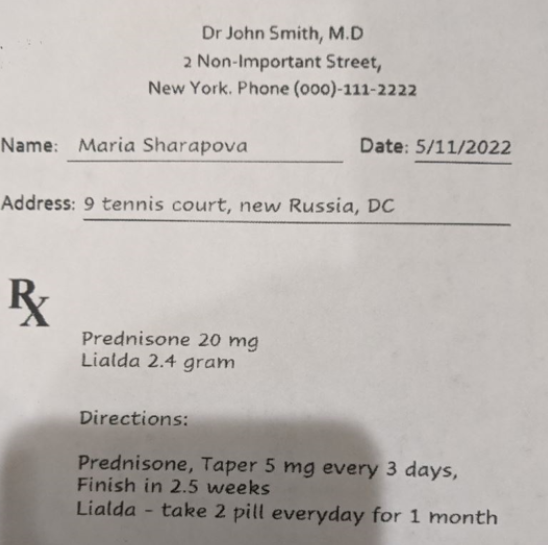

In [40]:
pages = convert_from_path(r"C:\Users\Najeeb\Desktop\SIT Semesters\Sem 6\Innerve 8 - automating data extraction for health records\pre_1.pdf",poppler_path=r'C:\Users\Najeeb\Desktop\SIT Semesters\Sem 6\Innerve 8 - automating data extraction for health records\poppler-0.68.0_x86\poppler-0.68.0\bin')

In [42]:
pages[0].show()

In [5]:
pytesseract.pytesseract.tesseract_cmd=r"C:\Program Files\Tesseract-OCR\tesseract.exe" # Mentioning Tesseract Directory To Utilize OCR Engine
text = pytesseract.image_to_string(pages[0],lang='eng') # Conversion Step 
print(text)

Dr John Smith, M.D
2 Non-Important Street,
New York, Phone (000)-111-2222

Name: Maria Sharapova Date: 5/11/2022

Address: 9 tennis court, new Russia, DC

—moemenmannenneneneunmnnnnennieesisiyoinnitniahadaaanniihsnseneneneeeernnttnnneenrenen:

Prednisone 20 mg
Lialda 2.4 gram

3 days,

or 1 month



#### Using Adaptive theshold to remove shadows and highlight shadowed areas

In [44]:
def preprocess_image(img):
    grey_scale = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2GRAY)
    resized_image = cv2.resize(grey_scale, None, fx=1.5, fy=1.5, interpolation=cv2.INTER_LINEAR)
    processed_image = cv2.adaptiveThreshold(
    resized_image, 255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY, 63, 13
    )
    return processed_image

In [51]:
out_img = preprocess_image(pages[0])
Image.fromarray(out_img).show()

In [52]:
pytesseract.pytesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
text = pytesseract.image_to_string(out_img, lang="eng")
print(text)

Dr John Smith, M.D
2 Non-Important Street,
New York, Phone (000)-111-2222

Name: Marta Sharapova Date: 5/11/2022

Address: 9 tennis court, new Russia, DC

K

Prednisone 20 mg
Lialda 2.4 gram

Directions:

Prednisone, Taper 5 mg every 3 days,
Finish in 2.5 weeks |
Ltalda - take 2 pill everyday for 1 month

Refill: 2 times



---
### Image 3

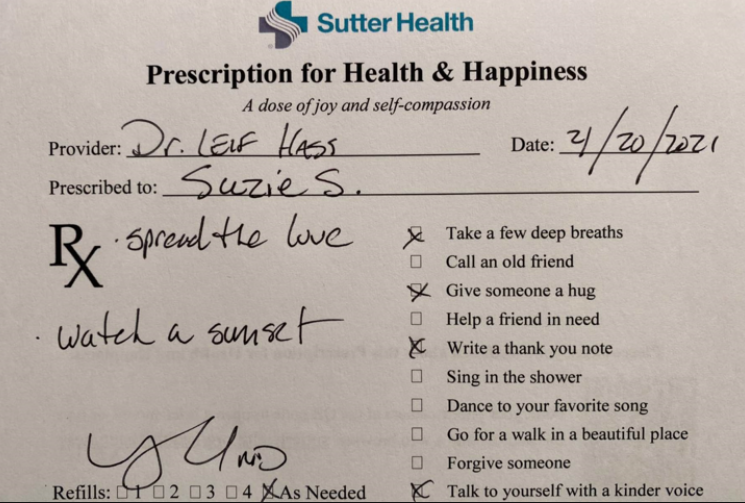

In [49]:
def extract_text_from_image(image_path):
    # Open the image file
    with Image.open(image_path) as img:
        # Use pytesseract to extract text
        text = pytesseract.image_to_string(img)
        return text

# Path to your image file
image_path = r"C:\Users\Najeeb\Desktop\SIT Semesters\Sem 6\Innerve 8 - automating data extraction for health records\doctor 3.jpg"

# Extract text from the image
extracted_text = extract_text_from_image(image_path)

# Print the extracted text
print(extracted_text)


SG sutter Health
Prescription for Health & Happiness

A dose of joy and self-compassion

Provider: ioe tia Lass Date: z

Prescribed to: v7. 524 2 ‘ < ‘
: 6 proud He love. JM Take a few deep breaths
0

Call an old friend
Give someone a hug

[| Help a friend in need
Wa A, 2 x Write a thank you note

Sing in the shower

[|] Dance to your favorite song

Go for a walk in a beautiful place
oD) Forgive someone
Refills: H2-03 04 jhAs Needed XC Talk to yourself with a kinder voice


